In [2]:
import tensorflow as tf
tf.range(5) # 1차원에 해당하는 수열(0~4) 생성

<tf.Tensor 'range_1:0' shape=(5,) dtype=int32>

In [3]:
tf.linspace(0.0,5,11) # 선형 공간 생성, 시작값은 float로 줘야함. linspace(시작, 끝, 나눠지는 구간)

<tf.Tensor 'LinSpace:0' shape=(11,) dtype=float32>

In [7]:
tf.zeros((2,3)) # 2행 3열 (상수 텐서), dtype을 따로 정의안하면 float32로 지정

<tf.Tensor 'zeros_3:0' shape=(2, 3) dtype=float32>

In [8]:
tf.ones((2,3)) # 2행 3열 모두 1로 채우기

<tf.Tensor 'ones:0' shape=(2, 3) dtype=float32>

In [9]:
tf.fill([3,3],5) # 3행 3열 모두 5로 채우기. tf.fill([3,3],1) = tf.ones((3,3))

<tf.Tensor 'Fill:0' shape=(3, 3) dtype=int32>

In [10]:
x=[[3,4,5],[0,0,1]] # 2행 3열 배열 
tf.zeros_like(x) # 2행 3열에 0이 모두 채워진채로 배열 생성

<tf.Tensor 'zeros_like:0' shape=(2, 3) dtype=int32>

In [13]:
tf.random.set_random_seed(777) # 동일한 난수 생성
tf.set_random_seed(777)
tf.random.shuffle([1,2,3,4]) # 데이터가 섞임
# tensorflow.org 사이트 참고 api 확인

<tf.Tensor 'RandomShuffle_1:0' shape=(4,) dtype=int32>

In [16]:
tf.reshape(x,(3,2)) #x가 1차원 벡터 -> 3행 2열 
tf.transpose(x) #전치행렬 

<tf.Tensor 'transpose_1:0' shape=(3, 2) dtype=int32>

In [25]:
r0=tf.reshape(tf.range(12),(3,4))
r0 # 0~11값을 3행 4열 배열로 변환
sess=tf.Session() # r0를 출력하고자 session 객체 생성
sess.run(r0)
r1=tf.slice(r0, [0,1], [2,3]) #(0,1) 위치에서 2개, 3개만큼 추출하겠다는 의미
print(sess.run(r1))
s1,s2=tf.split(r0,num_or_size_splits=2,axis=1)
print(s1)
print(s2)
print(sess.run(r0))
print(sess.run(s1))
print(sess.run(s2))

[[1 2 3]
 [5 6 7]]
Tensor("split_1:0", shape=(3, 2), dtype=int32)
Tensor("split_1:1", shape=(3, 2), dtype=int32)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[ 2  3]
 [ 6  7]
 [10 11]]


### 텐서플로우 연산

In [198]:
a=tf.range(6, dtype=tf.int32) #노드
b=2*tf.ones(6, dtype=tf.int32) #노드
print(sess.run(a))
print(sess.run(b))
print(sess.run(tf.add(a,b))) # 더하기
print(sess.run(tf.subtract(a,b))) # 빼기
print(sess.run(tf.multiply(a,b))) # 곱하기
print(sess.run(tf.divide(a,b))) # 나누기

[0 1 2 3 4 5]
[2 2 2 2 2 2]
[2 3 4 5 6 7]
[-2 -1  0  1  2  3]
[ 0  2  4  6  8 10]
[0.  0.5 1.  1.5 2.  2.5]


In [39]:
print(a+b) #=tf.add(a,b)

Tensor("add_6:0", shape=(6,), dtype=int32)


In [ ]:
# tf.abs() # 절대값
# tf.square() # 제곱
# tf.cumsum() # 누적합
# tf.sqrt() # 제곱근
# tf.maximum, minimum # 최대, 최소

# tf.reduce_mean():axis가 설정된 축을 기준으로 평균 계산
# tf.reduce_sum():axis가 설정된 축을 기준으로 합 계산
# tf.reduce_min():axis가 설정된 축을 기준으로 최소값 계산
# tf.reduce_max():axis가 설정된 축을 기준으로 최대값 계산    

In [45]:
# 텐서플로우에서는 데이터 타입 확인을 잘해야함
x=tf.constant([[2,0],[0,1]], dtype=tf.float32)
y=tf.constant([[1,0],[1,1]],dtype=tf.float32)
z=tf.matmul(x,y)  # 두 행렬에 대한 내적
print(sess.run(z))

[[2. 0.]
 [1. 1.]]


In [46]:
xinv=tf.linalg.inv(x) # x의 역행렬 
print(sess.run(xinv))

[[0.5 0. ]
 [0.  1. ]]


In [ ]:
# tf.nn.sigmoid() : 로지스틱 함수

### 회귀모델(hf=wx+b) 
ht : 예측값, 오류 : hf-ytrain

In [65]:
x=[1,2,3] # 입력값
ytrain=[1,2,3] # hf(예측값)과 비교할 실제 결과값
b=tf.Variable(tf.random_normal([1])) # 계속 업데이트되어야할 값이므로 variable로 지정
w=tf.Variable(tf.random_normal([1])) # varibale은 변수 초기화 해줘야함
sess=tf.Session()
sess.run(tf.global_variables_initializer())  # varibale은 변수 초기화 해줘야함
print(sess.run(b))
print(sess.run(w))
# 초기값은 상수로 줘도 되고, random값을 줘도 상관없음.
# random 값은 random_normal, random_uniform을 많이 씀

[-1.1779109]
[1.2301311]


In [104]:
# 예측값이 실제 결과값과 비슷해지도록 b,w를 업데이트
xtrain=[1,2,3] # 입력값
ytrain=[1,2,3] # hf(예측값)과 비교할 실제 결과값
b=tf.Variable(tf.random_normal([1])) # 계속 업데이트되어야할 값이므로 variable로 지정
w=tf.Variable(tf.random_normal([1])) # varibale은 변수 초기화 해줘야함

hf=xtrain*w+b 
cost=tf.reduce_mean(tf.square(hf-ytrain)) # 평균을 구하면 차원이 줄어드므로 함수 이름이 reduce_mean 이다.

# opt=tf.train.GradientDescentOptimizer(0.01) #learning_rate를 인수로 주면됨 
# train=opt.minimize(cost) # cost를 최소화하기
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

##여기까지 그래프 정의 부분##

##여기서부터 그래프 실행 부분##
sess=tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer())  # 변수 초기화

# training(머신러닝)
# for step in range(2001):
print("step 1: ")
# x=1, y=1
# -0.8*1+0.48 => 12.48
print("w=", sess.run(w), "b=", sess.run(b))
print("cost=",sess.run(cost))

sess.run(train)
print("step 2: ")
print("w=", sess.run(w), "b=", sess.run(b))
print("cost=",sess.run(cost))

sess.run(train) # train 노드를 실행해야 w,b가 업데이트 됨
print("step 3: ")
print("w=", sess.run(w), "b=", sess.run(b))
print("cost=",sess.run(cost))

#반복문 변경

step 1: 
w= [0.29568195] b= [-2.4267228]
cost= 15.040685
step 2: 
w= [0.4584872] b= [-2.3500156]
cost= 11.981262
step 3: 
w= [0.603029] b= [-2.281355]
cost= 9.562509


In [106]:
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 2.917552e-05 [1.0062734] [-0.01426085]
20 2.6497428e-05 [1.0059786] [-0.01359064]
40 2.406502e-05 [1.0056976] [-0.01295193]
60 2.185719e-05 [1.0054299] [-0.01234328]
80 1.9850773e-05 [1.0051746] [-0.01176321]
100 1.8028417e-05 [1.0049314] [-0.01121038]
120 1.6373802e-05 [1.0046997] [-0.01068352]
140 1.4870607e-05 [1.0044788] [-0.01018144]
160 1.3506221e-05 [1.0042684] [-0.00970296]
180 1.2266574e-05 [1.0040679] [-0.00924702]
200 1.11409245e-05 [1.0038767] [-0.00881247]
220 1.0118127e-05 [1.0036944] [-0.00839835]
240 9.189516e-06 [1.0035208] [-0.00800369]
260 8.3466175e-06 [1.0033555] [-0.00762759]
280 7.5802623e-06 [1.0031977] [-0.00726914]
300 6.88474e-06 [1.0030475] [-0.00692756]
320 6.252696e-06 [1.0029043] [-0.00660205]
340 5.6788635e-06 [1.0027679] [-0.00629183]
360 5.157641e-06 [1.0026377] [-0.00599617]
380 4.684218e-06 [1.0025138] [-0.00571438]
400 4.2546394e-06 [1.0023956] [-0.00544583]
420 3.86414e-06 [1.0022831] [-0.00518993]
440 3.5094884e-06 [1.0021758] [-0.00494604]
460 

### placeholder를 사용한 학습
데이터를 불러와서 훈련시킬 경우

In [100]:
w=tf.Variable(tf.random_normal([1]),name="weigth")
b=tf.Variable(tf.random_normal([1]),name="bias")

In [102]:
x=tf.placeholder(dtype=tf.float32, shape=[None]) # 입력 데이터의 건수 자리를 none으로 주는게 일반적
y=tf.placeholder(dtype=tf.float32, shape=[None]) # 데이터의 건수는 x와 동일해야함
hf=x*w+b
cost = tf.reduce_mean(tf.square(hf-y))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [108]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv, wv, bv, _ =sess.run([cost,w,b,train], feed_dict={x:[1,2,3],y:[1,2,3]}) 
    # 한꺼번에 실행하고자 할때는 대괄호 기호로 묶어주기
    # run 함수의 리턴 값은 4개가 출력
    # train은 값이 아니고 훈련시키는 것이므로 변수 지정할 필요없이 무시한다는 의미로 _ 기호 사용
    if step %20 == 0:
        print(step, cv, wv, bv)

0 15.040685 [0.4584872] [-2.3500156]
20 0.5421528 [1.6161046] [-1.741531]
40 0.37345442 [1.6949543] [-1.6122624]
60 0.33809897 [1.672559] [-1.5319765]
80 0.3070571 [1.6419287] [-1.459549]
100 0.27887395 [1.6118532] [-1.3909144]
120 0.25327772 [1.5831074] [-1.3255424]
140 0.2300309 [1.5557042] [-1.2632463]
160 0.20891774 [1.5295882] [-1.2038785]
180 0.18974237 [1.5046995] [-1.1473005]
200 0.17232694 [1.4809803] [-1.0933815]
220 0.15651017 [1.4583762] [-1.0419966]
240 0.14214516 [1.4368342] [-0.99302685]
260 0.1290984 [1.4163045] [-0.9463582]
280 0.11724931 [1.3967397] [-0.90188277]
300 0.1064877 [1.3780946] [-0.85949755]
320 0.0967138 [1.3603255] [-0.8191044]
340 0.08783699 [1.3433915] [-0.7806095]
360 0.07977503 [1.3272536] [-0.7439238]
380 0.07245296 [1.3118738] [-0.70896244]
400 0.06580299 [1.2972169] [-0.6756439]
420 0.05976334 [1.2832488] [-0.64389104]
440 0.054278027 [1.269937] [-0.6136306]
460 0.04929615 [1.2572511] [-0.58479226]
480 0.044771563 [1.245161] [-0.5573092]
500 0.0406

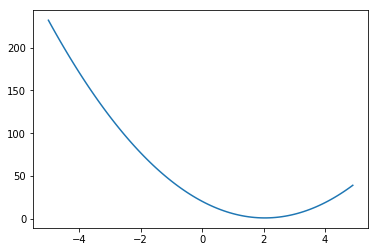

In [111]:
import matplotlib.pyplot as plt
xtrain=[1,2,3] # 입력값
ytrain=[1,2,3] # hf(예측값)과 비교할 실제 결과값
w=tf.placeholder(tf.float32)
hf=xtrain*w+b 
cost=tf.reduce_mean(tf.square(hf-ytrain)) 
sess=tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer())  # 변수 초기화
wvList=[]
cvList=[]
# training(머신러닝)
for step in range(-50,50):
    fw=step*0.1
    cv,wv=sess.run([cost,w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.plot(wvList, cvList)
plt.show()

In [124]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
b=tf.Variable([-.3], tf.float32)
w=tf.Variable([100.], tf.float32)

hf=x*w+b 
loss=tf.reduce_sum(tf.square(hf-y)) # 손실함수 = 비용함수
train=tf.train.GradientDescentOptimizer(0.01).minimize(loss) # 데이터에 따라 learning rate가 달라짐
xtrain=[1,2,3,4]
ytrain=[0,-1,-2,-3]

##여기까지 그래프 정의 부분##

##여기서부터 그래프 실행 부분##
sess=tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer())  # 변수 초기화
# training(머신러닝)
for step in range(2001):
    sess.run(train,feed_dict={x:xtrain, y:ytrain})
    if step % 20 == 0:
        wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})
        print("w:%s b:%s loss:%s" % (wv,bv,lv))
# wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})
# print("w:%s b:%s loss:%s" % (wv,bv,lv))

w:[39.66] b:[-20.395998] loss:34029.0
w:[7.439225] b:[-23.812351] loss:411.28638
w:[5.6321735] b:[-18.4994] loss:254.01004
w:[4.212058] b:[-14.324087] loss:156.87642
w:[3.096025] b:[-11.042812] loss:96.88673
w:[2.2189624] b:[-8.464142] loss:59.837154
w:[1.5297011] b:[-6.4376297] loss:36.955368
w:[0.98802805] b:[-4.8450446] loss:22.823597
w:[0.562341] b:[-3.593473] loss:14.095835
w:[0.22780417] b:[-2.609894] loss:8.705573
w:[-0.03509986] b:[-1.8369241] loss:5.3765526
w:[-0.24170944] b:[-1.2294667] loss:3.3205535
w:[-0.40407863] b:[-0.7520815] loss:2.0507705
w:[-0.53168046] b:[-0.3769166] loss:1.266554
w:[-0.6319595] b:[-0.08208393] loss:0.78222257
w:[-0.7107663] b:[0.14961761] loss:0.48309994
w:[-0.7726985] b:[0.331706] loss:0.29836208
w:[-0.8213695] b:[0.47480467] loss:0.18426812
w:[-0.85961884] b:[0.5872623] loss:0.11380383
w:[-0.889678] b:[0.6756398] loss:0.07028515
w:[-0.9133007] b:[0.7450935] loss:0.04340807
w:[-0.9318652] b:[0.79967535] loss:0.02680881
w:[-0.9464546] b:[0.84257007

### GradientDescentOptimizer 직접 코딩하기 

In [137]:
xtrain=[1,2,3]
ytrain=[2,4,7]
w=tf.Variable(5.0)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [138]:
hf=x*w
cost=tf.reduce_mean(tf.square(hf-y))

In [144]:
# train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# 위의 문장과 같은 결과 도출
lr=0.01
gradient=tf.reduce_mean((w*x-y)*x) # 노드
descent=w-lr*gradient # 노드 => 노드이므로 session을 진행해야 결과가 나옴
# descent 노드를 구하면 업데이트할 w가 구해지는 것이고 실제 w를 업데이트 한 것은 아님
update=w.assign(descent) # w를 업데이트하고 descent 결과 도출

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    sess.run(update, feed_dict={x:xtrain,y:ytrain})
    print(step, sess.run(cost,feed_dict={x:xtrain,y:ytrain}))

0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


In [130]:
for step in range(100):
    print(step, sess.run(w))
    sess.run(train)

0 5.0
1 4.74
2 4.5042663
3 4.290535
4 4.0967517
5 3.9210548
6 3.7617564
7 3.6173258
8 3.4863753
9 3.367647
10 3.26
11 3.1624
12 3.0739093
13 2.9936779
14 2.9209347
15 2.8549807
16 2.7951825
17 2.7409654
18 2.6918087
19 2.64724
20 2.6068308
21 2.5701933
22 2.5369751
23 2.5068574
24 2.4795506
25 2.4547925
26 2.4323452
27 2.411993
28 2.3935404
29 2.3768098
30 2.361641
31 2.3478878
32 2.3354182
33 2.3241124
34 2.3138618
35 2.304568
36 2.2961416
37 2.2885017
38 2.281575
39 2.2752945
40 2.2696004
41 2.2644377
42 2.2597568
43 2.255513
44 2.251665
45 2.2481763
46 2.2450132
47 2.2421453
48 2.239545
49 2.2371876
50 2.2350502
51 2.233112
52 2.231355
53 2.2297618
54 2.2283175
55 2.2270079
56 2.2258205
57 2.2247438
58 2.2237678
59 2.2228827
60 2.2220805
61 2.221353
62 2.2206933
63 2.2200954
64 2.2195532
65 2.2190616
66 2.2186158
67 2.2182117
68 2.2178452
69 2.217513
70 2.217212
71 2.2169387
72 2.216691
73 2.2164664
74 2.2162628
75 2.2160783
76 2.215911
77 2.2157593
78 2.2156217
79 2.215497
80 2.215

### 선형회귀

In [155]:
import numpy as np
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
num_points=200
vectors_set=[]
for i in range(num_points):
    x=np.random.normal(5,5)+15
    y=x*1000+np.random.normal(0,3)*1000
    vectors_set.append([x,y])
xdata=[v[0] for v in vectors_set] # vectors_set 0번째 열 출력
ydata=[v[1] for v in vectors_set] # vectors_set 1번째 열 출력

W0729 14:44:21.951329  9536 legend.py:1289] No handles with labels found to put in legend.


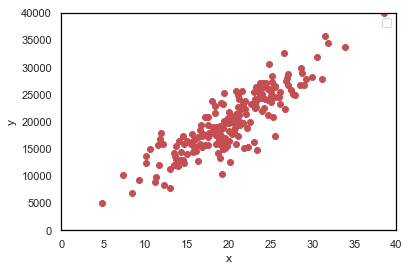

In [158]:
plt.plot(xdata,ydata,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,40])
plt.ylim([0,40000])
plt.legend()

In [199]:
w=tf.Variable(tf.random_uniform([1],-1.0,1.0)) # -1~1 균등하게 난수 생성
b=tf.Variable(tf.zeros([1]))
y=w*xdata+b
loss=tf.reduce_mean(tf.square(y-ydata))

In [200]:
train=tf.train.GradientDescentOptimizer(0.001).minimize(loss)
sess.run(tf.initialize_all_variables()) # 변수 초기화

0 [851.9839] [39.76244]
0 15180396.0


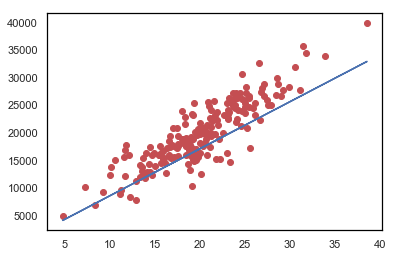

1 [965.9699] [45.137897]
1 7798462.5


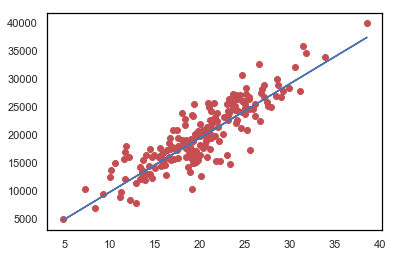

2 [981.2172] [45.912792]
2 7666327.5


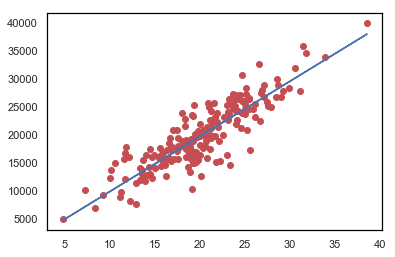

3 [983.2546] [46.07218]
3 7663959.0


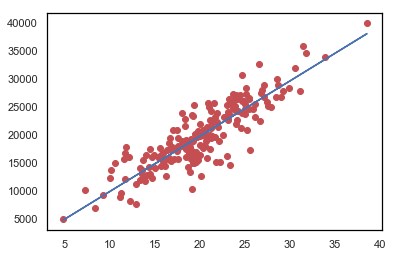

4 [983.52454] [46.149216]
4 7663912.5


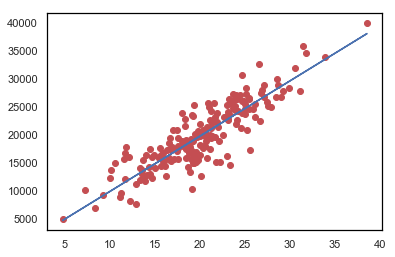

5 [983.5581] [46.215225]
5 7663908.0


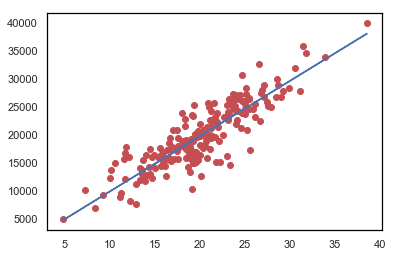

6 [983.56] [46.27975]
6 7663903.5


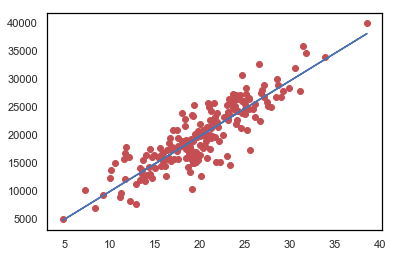

7 [983.5576] [46.344074]
7 7663899.0


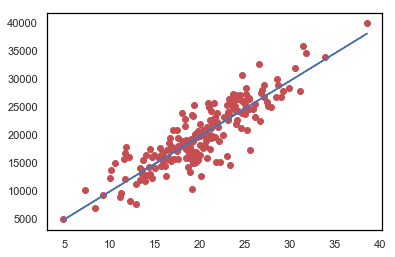

8 [983.55475] [46.408363]
8 7663894.5


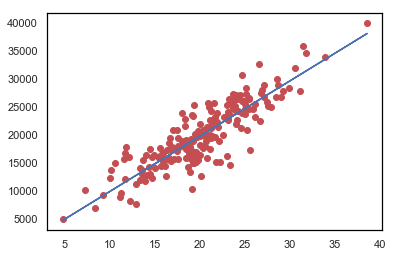

9 [983.55176] [46.472637]
9 7663891.0


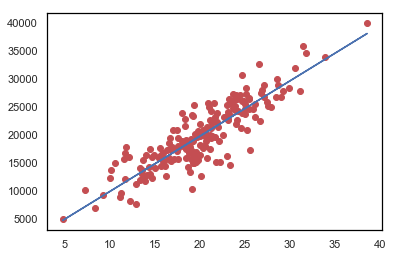

In [201]:
# 모델 생성
for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    plt.plot(xdata,ydata,'ro')
    plt.plot(xdata,sess.run(w)*xdata+sess.run(b))
    plt.show()

### keras 패키지 : 텐서플로우를 엔진으로 사용하는 파이썬 패키지 
신경망을 쉽게 구현  
다양한 연습용 데이터 셋 제공(CIFAR10, CIFAR100, 영화, 뉴스, )

In [170]:
from tensorflow import keras
mnist=keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

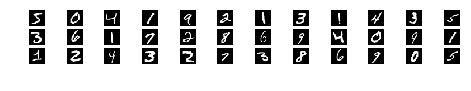

In [172]:
plt.figure(figsize=(8,1))
for i in range(36):
    plt.subplot(3,12,i+1) # 맨 왼쪽 상단부터 숫자 이미지 출력
    plt.imshow(xtrain[i],cmap='gray')
    plt.axis('off')
plt.show()    
# [5 0 4 1 9 2 1 3 1 4] 

In [178]:
print(xtrain.shape) # 6만장의 이미지가 있고, 28x28 해상도를 가짐
print(ytrain.shape) # 5->0000010000 이런식의 카테고리 형식으로 원핫인코딩 해줘야함
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [187]:
xtrain=xtrain.reshape(60000,28*28).astype('float32')/255.0
xtest=xtest.reshape(10000,28*28).astype('float32')/255.0
print(xtrain.shape, xtrain.dtype)
print(xtest.shape, xtest.dtype)
print(ytrain[:10]) # [5 0 4 1 9 2 1 3 1 4] : ylabel 값 출력

(60000, 784) float32
(10000, 784) float32
[5 0 4 1 9 2 1 3 1 4]


In [192]:
# 이미지 데이터 원핫인코딩으로 변환
from tensorflow.keras.utils import to_categorical 
ytrain=to_categorical(ytrain, 10) # 몇개의 종류로 카테고리화 할지 정함
ytest=to_categorical(ytest,10)
ytrain[:10]

array([[[[[1., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],

         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],

         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0.

### keras 신경망 모델 생성
keras로 신경망 구성하는 순서  
1) Sequential 클래스 -> 객체 생성  
2) add 메서드 -> 층(레이어)을 추가  
  - 입력부터 순서대로 추가
  - shape 체크
  - activation 활성화 설정  
  - 2개 변수 -> 4개입, 10개출 -> 10개입, 20개출 -> 20개입
  
  
3) compile 메서드 -> 모델 생성
  - loss, optimizer (알고리즘), 성능기준설정
  
  
4) fit 메서드 -> 트레이닝
  - 에폭 설정(6만개 data가 있다면 1에폭=6만개 training)
  - 배치설정(분할 모델링, 큐러너 등 사용)

In [193]:
# keras 신경망 모델 3번까지 진행
# from tensorflow.keras import * # 전부다 가져와라
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0) # 동일한 난수 생성

In [195]:
model=Sequential()
model.add(Dense(15, input_dim=784,activation='sigmoid')) # 층 추가, input_dim은 맨 처음 입력받는 층에만 존재
model.add(Dense(10 ,activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error', metrics=['accuracy'])

W0729 16:13:17.214274  9536 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [196]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
